In [1]:
%load_ext watermark


In [2]:
import itertools as it
import os

import numpy as np

from pylib.auxlib._log_context_duration import log_context_duration
from pylib.auxlib._make_reproducible import make_reproducible
from pylib.synthgeom._VideoWriter import VideoWriter
from pylib.synthgeom._generate_observations import generate_observations

make_reproducible()


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-03-25T01:47:11.128829+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1021-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

numpy: 1.23.5

Watermark: 2.4.3



In [4]:
SX, SY = 400, 400
crea_func = np.ones
crea_size = 10


In [5]:
image_counter = it.count()
image_subdir = "out/dev-synthgeom"
os.makedirs(image_subdir, exist_ok=True)


def make_gif_path():
    return f"{image_subdir}/image_{next(image_counter):04d}.gif"


In [6]:
def show_sample_observations(
    SX,
    SY,
    *,
    crea_func,
    crea_size=10,
    fps=30.0,
    logger=print,
    mirror_backtrack=False,
    num_frames=1000,
):

    observations = generate_observations(
        SX=SX,
        SY=SY,
        crea_func=crea_func,
        crea_size=crea_size,
        mirror_backtrack=mirror_backtrack,
        num_frames=num_frames,
    )
    with log_context_duration("Creating video", logger=logger):
        with VideoWriter(make_gif_path(), fps) as vid:
            vid.add_observations(observations)
            vid.show()


enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 2 colors in source)


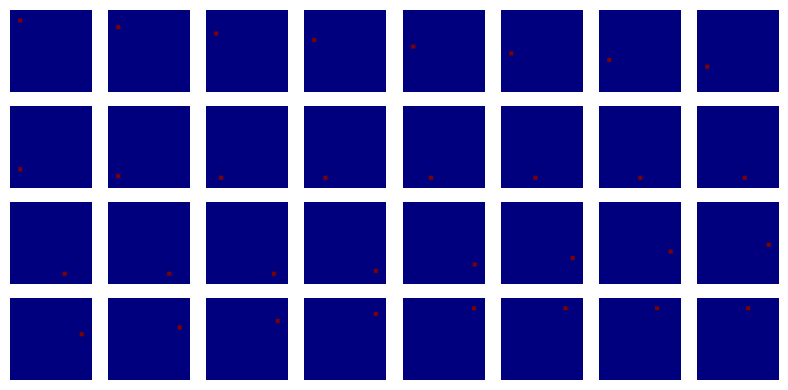

exit log_context_duration for Creating video
!!! {"Creating video": 23.413355588912964}


In [7]:
show_sample_observations(
    SX,
    SY,
    crea_func=np.ones,
)


enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 2 colors in source)


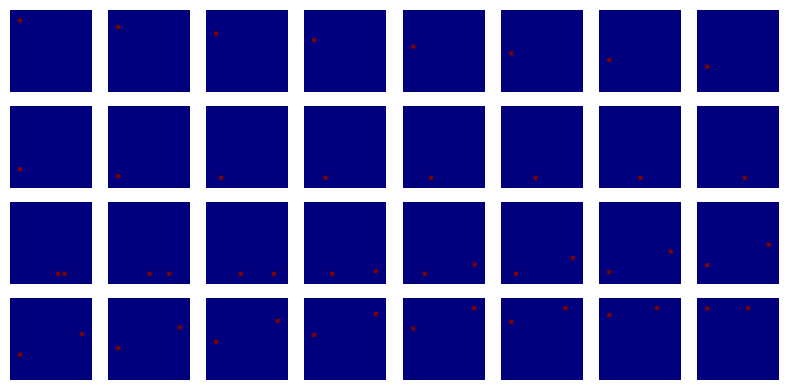

exit log_context_duration for Creating video
!!! {"Creating video": 20.92518424987793}


In [8]:
show_sample_observations(
    SX,
    SY,
    crea_func=np.ones,
    mirror_backtrack=True,
)


enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 224 colors in source)


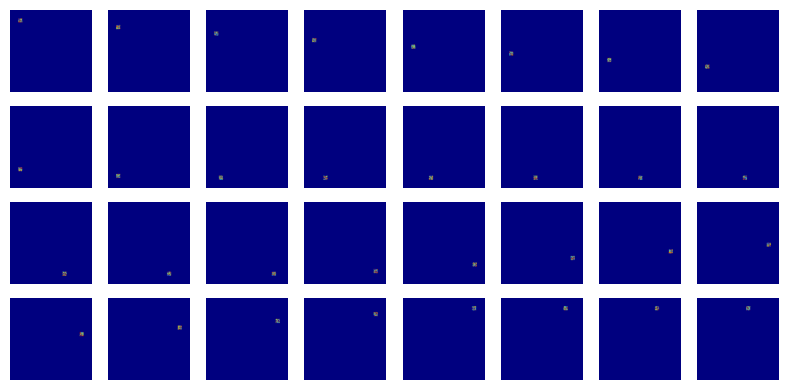

exit log_context_duration for Creating video
!!! {"Creating video": 24.46965980529785}
enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 226 colors in source)


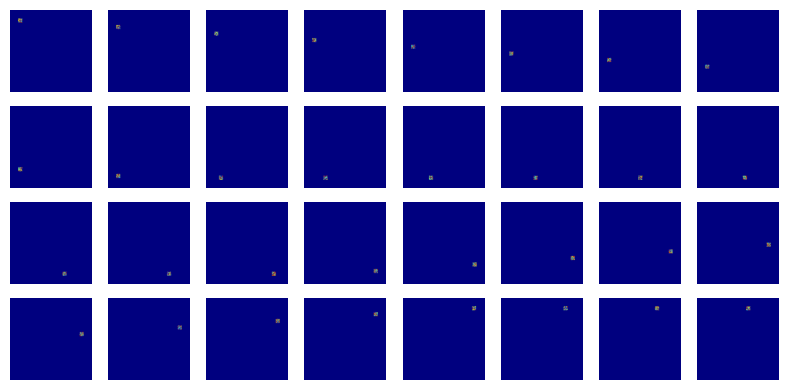

exit log_context_duration for Creating video
!!! {"Creating video": 25.115394592285156}


In [9]:
for i in range(2):
    show_sample_observations(
        SX,
        SY,
        crea_func=lambda x: np.random.rand(*x),
    )


enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 226 colors in source)


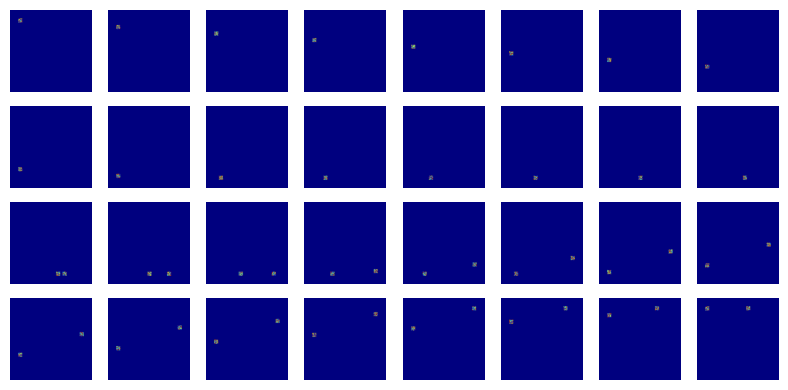

exit log_context_duration for Creating video
!!! {"Creating video": 26.516942024230957}
enter log_context_duration for Creating video


gifsicle: warning: trivial adaptive palette (only 224 colors in source)


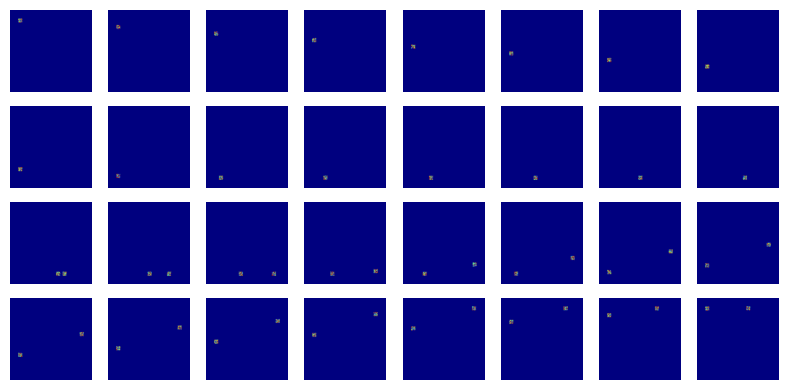

exit log_context_duration for Creating video
!!! {"Creating video": 26.667837619781494}


In [10]:
for i in range(2):
    show_sample_observations(
        SX,
        SY,
        crea_func=lambda x: np.random.rand(*x),
        mirror_backtrack=True,
    )
